In [2]:
import time
import numpy as np
import pandas as pd
from typing import Tuple
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [3]:
data = pd.read_csv('../data/DevelopmentData.csv', sep=';')
data.set_index('Unnamed: 0', inplace=True)
data.index.rename('ind', inplace=True)
data

,FirstObjectDistance_X,FirstObjectDistance_Y,SecondObjectDistance_X,SecondObjectDistance_Y,ThirdObjectDistance_X,ThirdObjectDistance_Y,FourthObjectDistance_X,FourthObjectDistance_Y,VehicleSpeed,FirstObjectSpeed_X,FirstObjectSpeed_Y,SecondObjectSpeed_X,SecondObjectSpeed_Y,ThirdObjectSpeed_X,ThirdObjectSpeed_Y,FourthObjectSpeed_X,FourthObjectSpeed_Y,YawRate,Timestamp
ind,,,,,,,,,,,,,,,,,,,
0,8211,1444,5455,-1153,3103,-1237,12024,1715,0,-2,0,4,1,1,7,7,0,0.000000,33.241504
1,8208,1443,5455,-1153,3102,-1237,0,0,0,-4,0,-2,3,0,6,0,0,0.000000,33.335960
2,8211,1444,5453,-1160,3104,-1232,0,0,0,-3,0,-1,-9,5,8,0,0,0.000000,33.429725
3,8209,1445,5452,-1166,3104,-1232,0,0,0,-4,0,0,-14,3,12,0,0,0.000000,33.522769
4,8209,1445,5452,-1167,3106,-1225,0,0,0,0,1,0,-11,8,16,0,0,0.000000,33.618715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,782,-589,9912,-2071,0,0,1145,-733,0,280,-176,10,34,0,0,1,-10,-0.001343,72.804477
424,825,-619,9911,-2065,0,0,1144,-733,0,696,-153,3,38,0,0,7,-5,-0.001343,72.889443
425,820,-631,9906,-2060,0,0,1146,-730,0,674,-153,10,31,0,0,18,-5,-0.001343,72.972854


In [4]:
data_normed = data.copy()

data_normed[['FirstObjectDistance_X', 'FirstObjectDistance_Y', 'SecondObjectDistance_X', 'SecondObjectDistance_Y', 'ThirdObjectDistance_X', 'ThirdObjectDistance_Y', 'FourthObjectDistance_X', 'FourthObjectDistance_Y']] = \
data[['FirstObjectDistance_X', 'FirstObjectDistance_Y', 'SecondObjectDistance_X', 'SecondObjectDistance_Y', 'ThirdObjectDistance_X', 'ThirdObjectDistance_Y', 'FourthObjectDistance_X', 'FourthObjectDistance_Y']] / 128

data_normed[['VehicleSpeed', 'FirstObjectSpeed_X', 'FirstObjectSpeed_Y', 'SecondObjectSpeed_X', 'SecondObjectSpeed_Y', 'ThirdObjectSpeed_X', 'ThirdObjectSpeed_Y', 'FourthObjectSpeed_X', 'FourthObjectSpeed_Y']] = \
data[['VehicleSpeed', 'FirstObjectSpeed_X', 'FirstObjectSpeed_Y', 'SecondObjectSpeed_X', 'SecondObjectSpeed_Y', 'ThirdObjectSpeed_X', 'ThirdObjectSpeed_Y', 'FourthObjectSpeed_X', 'FourthObjectSpeed_Y']] / 256

data_normed

,FirstObjectDistance_X,FirstObjectDistance_Y,SecondObjectDistance_X,SecondObjectDistance_Y,ThirdObjectDistance_X,ThirdObjectDistance_Y,FourthObjectDistance_X,FourthObjectDistance_Y,VehicleSpeed,FirstObjectSpeed_X,FirstObjectSpeed_Y,SecondObjectSpeed_X,SecondObjectSpeed_Y,ThirdObjectSpeed_X,ThirdObjectSpeed_Y,FourthObjectSpeed_X,FourthObjectSpeed_Y,YawRate,Timestamp
ind,,,,,,,,,,,,,,,,,,,
0,64.148438,11.281250,42.617188,-9.007812,24.242188,-9.664062,93.937500,13.398438,0.0,-0.007812,0.000000,0.015625,0.003906,0.003906,0.027344,0.027344,0.000000,0.000000,33.241504
1,64.125000,11.273438,42.617188,-9.007812,24.234375,-9.664062,0.000000,0.000000,0.0,-0.015625,0.000000,-0.007812,0.011719,0.000000,0.023438,0.000000,0.000000,0.000000,33.335960
2,64.148438,11.281250,42.601562,-9.062500,24.250000,-9.625000,0.000000,0.000000,0.0,-0.011719,0.000000,-0.003906,-0.035156,0.019531,0.031250,0.000000,0.000000,0.000000,33.429725
3,64.132812,11.289062,42.593750,-9.109375,24.250000,-9.625000,0.000000,0.000000,0.0,-0.015625,0.000000,0.000000,-0.054688,0.011719,0.046875,0.000000,0.000000,0.000000,33.522769
4,64.132812,11.289062,42.593750,-9.117188,24.265625,-9.570312,0.000000,0.000000,0.0,0.000000,0.003906,0.000000,-0.042969,0.031250,0.062500,0.000000,0.000000,0.000000,33.618715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,6.109375,-4.601562,77.437500,-16.179688,0.000000,0.000000,8.945312,-5.726562,0.0,1.093750,-0.687500,0.039062,0.132812,0.000000,0.000000,0.003906,-0.039062,-0.001343,72.804477
424,6.445312,-4.835938,77.429688,-16.132812,0.000000,0.000000,8.937500,-5.726562,0.0,2.718750,-0.597656,0.011719,0.148438,0.000000,0.000000,0.027344,-0.019531,-0.001343,72.889443
425,6.406250,-4.929688,77.390625,-16.093750,0.000000,0.000000,8.953125,-5.703125,0.0,2.632812,-0.597656,0.039062,0.121094,0.000000,0.000000,0.070312,-0.019531,-0.001343,72.972854


In [5]:
vehicle_data = data_normed[["VehicleSpeed", "YawRate", "Timestamp"]]
vehicle_data

,VehicleSpeed,YawRate,Timestamp
ind,,,
0,0.0,0.000000,33.241504
1,0.0,0.000000,33.335960
2,0.0,0.000000,33.429725
3,0.0,0.000000,33.522769
4,0.0,0.000000,33.618715
...,...,...,...
423,0.0,-0.001343,72.804477
424,0.0,-0.001343,72.889443
425,0.0,-0.001343,72.972854


<Axes: xlabel='ind'>

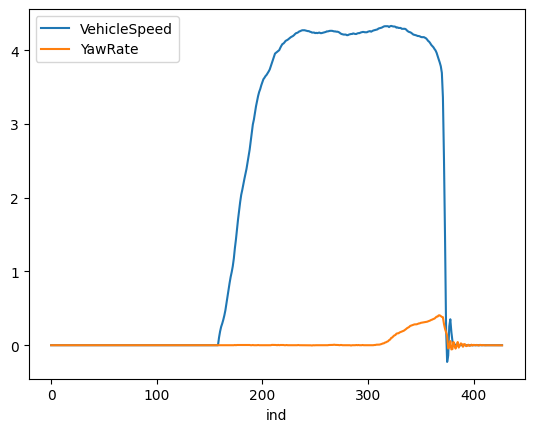

In [6]:
vehicle_data[["VehicleSpeed", "YawRate"]].plot()

In [7]:
vehicle_data['DeltaTime'] = vehicle_data['Timestamp'].diff().fillna(0)
vehicle_data

/tmp/ipykernel_62540/279264646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data['DeltaTime'] = vehicle_data['Timestamp'].diff().fillna(0)


,VehicleSpeed,YawRate,Timestamp,DeltaTime
ind,,,,
0,0.0,0.000000,33.241504,0.000000
1,0.0,0.000000,33.335960,0.094456
2,0.0,0.000000,33.429725,0.093766
3,0.0,0.000000,33.522769,0.093044
4,0.0,0.000000,33.618715,0.095946
...,...,...,...,...
423,0.0,-0.001343,72.804477,0.082599
424,0.0,-0.001343,72.889443,0.084966
425,0.0,-0.001343,72.972854,0.083411


In [8]:
vehicle_data.DeltaTime.mean()

0.09322915857476635

In [9]:
def calculate_vehicle_coordinates(vehicle_data: pd.DataFrame) -> Tuple[list, list]:
    """
    Given a dataframe containing the vehicle's speed, yaw rate and the timedelta, for each timestep, return a list of the vehicle's x and y coordinates.

    :param vehicle_data: The dataframe containing the information about the vehicle.

    :return: A tuple containing two lists, for the x and y coordinates of the vehicle in each timestep.
    """
    # Initializes the starting state
    x, y, heading = 0, 0, 0
    computed_x_coordinates = [x]
    computed_y_coordinates = [y]
    # Iterate through the timesteps
    for _, row in vehicle_data.iterrows():
        # Calculate the parameters required to get the coordinates
        delta_time = row["DeltaTime"]
        distance_traveled = row["VehicleSpeed"] * delta_time
        delta_yaw = row["YawRate"] * delta_time
        # Update x and y with using these parameters
        x += distance_traveled * np.cos(heading)
        y += distance_traveled * np.sin(heading)
        
        heading += delta_yaw
        computed_x_coordinates.append(x)
        computed_y_coordinates.append(y)
    return (computed_x_coordinates, computed_y_coordinates)
        

In [10]:
computed_x_coordinates, computed_y_coordinates = calculate_vehicle_coordinates(vehicle_data)
del computed_x_coordinates[0]
del computed_y_coordinates[0]

In [11]:
vehicle_data["x"] = computed_x_coordinates
vehicle_data["y"] = computed_y_coordinates

/tmp/ipykernel_62540/601957199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data["x"] = computed_x_coordinates
/tmp/ipykernel_62540/601957199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data["y"] = computed_y_coordinates


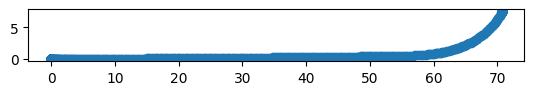

In [12]:
plt.scatter(computed_x_coordinates, computed_y_coordinates)
ax = plt.gca()
ax.set_aspect("equal", adjustable="box")
plt.draw()

In [13]:
object0 = data_normed[["FirstObjectDistance_X", "FirstObjectDistance_Y", "FirstObjectSpeed_X", "FirstObjectSpeed_Y", "Timestamp"]]
object1 = data_normed[["SecondObjectDistance_X", "SecondObjectDistance_Y", "SecondObjectSpeed_X", "SecondObjectSpeed_Y", "Timestamp"]]
object2 = data_normed[["ThirdObjectDistance_X", "ThirdObjectDistance_Y", "ThirdObjectSpeed_X", "ThirdObjectSpeed_Y", "Timestamp"]]
object3 = data_normed[["FourthObjectDistance_X", "FourthObjectDistance_Y", "FourthObjectSpeed_X", "FourthObjectSpeed_Y", "Timestamp"]]

In [14]:
def get_object_absolute_coordinates(vehicle_data: pd.DataFrame, object_data: pd.DataFrame, column_a, column_b) -> pd.DataFrame:
    """
    Given a dataframe of our vehicle's movements, and a dataframe of the object, return a dataframe of the object's absolute position for each timestep.

    :param vehicle_data: The dataframe containing the vehicle's data.
    :param object_data: The dataframe containing the object's data.

    :return: A dataframe containing the object's absolute data.
    """
    merged = vehicle_data[["x", "y", "Timestamp"]].merge(object_data[[column_a, column_b, "Timestamp"]], on="Timestamp")
    merged[f"absolute_{column_a}"] = merged["x"] + merged[column_a]
    merged[f"absolute_{column_b}"] = merged["y"] + merged[column_b]
    merged.drop([column_a, column_b, "x", "y"], inplace=True, axis="columns")
    return merged

In [15]:
object0_absolute = get_object_absolute_coordinates(vehicle_data, object0, "FirstObjectDistance_X", "FirstObjectDistance_Y")
object1_absolute = get_object_absolute_coordinates(vehicle_data, object1, "SecondObjectDistance_X", "SecondObjectDistance_Y")
object2_absolute = get_object_absolute_coordinates(vehicle_data, object2, "ThirdObjectDistance_X", "ThirdObjectDistance_Y")
object3_absolute = get_object_absolute_coordinates(vehicle_data, object3, "FourthObjectDistance_X", "FourthObjectDistance_Y")

In [16]:
object1_absolute

,Timestamp,absolute_SecondObjectDistance_X,absolute_SecondObjectDistance_Y
0,33.241504,42.617188,-9.007812
1,33.335960,42.617188,-9.007812
2,33.429725,42.601562,-9.062500
3,33.522769,42.593750,-9.109375
4,33.618715,42.593750,-9.117188
...,...,...,...
423,72.804477,148.169669,-8.725620
424,72.889443,148.161856,-8.678745
425,72.972854,148.122794,-8.639683
426,73.057103,148.091544,-8.538120


KeyboardInterrupt: 

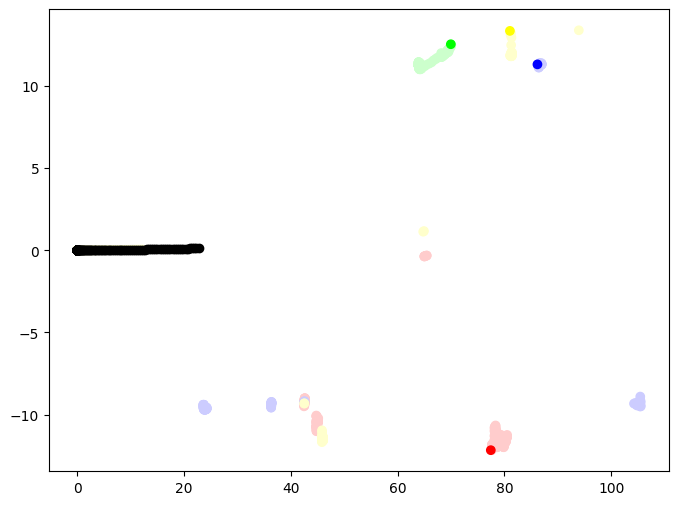

In [26]:
plt.ion()
plt.figure(figsize=(8, 6))
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Interactive Scatter Plot')

for i in range(200, len(object0_absolute)):
    plt.clf()
    
    plt.scatter(object0_absolute["absolute_FirstObjectDistance_X"][:i], object0_absolute["absolute_FirstObjectDistance_Y"][:i], c=[(0.8, 1, 0.8)] * (i - 1) + [(0, 1, 0)], marker='o')
    plt.scatter(object1_absolute["absolute_SecondObjectDistance_X"][:i], object1_absolute["absolute_SecondObjectDistance_Y"][:i], c=[(1, 0.8, 0.8)] * (i - 1) + [(1, 0, 0)], marker='o')
    plt.scatter(object2_absolute["absolute_ThirdObjectDistance_X"][:i], object2_absolute["absolute_ThirdObjectDistance_Y"][:i], c=[(0.8, 0.8, 1)] * (i - 1) + [(0, 0, 1)], marker='o')
    plt.scatter(object3_absolute["absolute_FourthObjectDistance_X"][:i], object3_absolute["absolute_FourthObjectDistance_Y"][:i], c=[(1, 1, 0.8)] * (i - 1) + [(1, 1, 0)], marker='o')
    plt.scatter(computed_x_coordinates[:i], computed_y_coordinates[:i], c=[(0.8, 0.8, 0.8)] * (i - 1) + [(0, 0, 0)])

    display(plt.gcf())
    clear_output(wait=True)
    time.sleep(0.1)

plt.ioff()
plt.show()